# Аналіз зібраних даних

Задача прогнозування ціни на ноутбуки вимагає вибору предикторів, вибору моделі та оцінки її точності.

Розділемо процес аналізу зібраних даних на декілька етапів: візуалізації вмісту датафрейму, кореляційний аналіз, дисперсійний аналіз, факторний аналіз, побудова та вдосконалення регресійних моделей, оцінку та висновки

In [ ]:
import pandas as pd
import numpy as np

Перед аналізом імпортуємо дані

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
filename = "/content/drive/My Drive/Laptop_prices_clean.csv"

df = pd.read_csv(filename)

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1020 non-null   int64  
 1   Name                 1020 non-null   object 
 2   Brand                1020 non-null   object 
 3   Price                1020 non-null   int64  
 4   Rating               1020 non-null   float64
 5   Processor_brand      1020 non-null   object 
 6   Processor_name       1020 non-null   object 
 7   Processor_variant    1020 non-null   object 
 8   Processor_gen        1020 non-null   int64  
 9   Core_per_processor   1020 non-null   int64  
 10  Threads              1020 non-null   int64  
 11  RAM_GB               1020 non-null   int64  
 12  RAM_type             1020 non-null   object 
 13  Storage_capacity_GB  1020 non-null   int64  
 14  Storage_type         1020 non-null   object 
 15  Graphics_name        1020 non-null   o

## Візуалізації даних

Роботу слід почати з візуалізацій. Використаємо різні види графіків для чіткого розуміння даних, з якими працюємо

<ipython-input-6-97618a8c6a18>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Price', y = 'Brand', data = mean_price_by_brand, palette = 'Spectral')


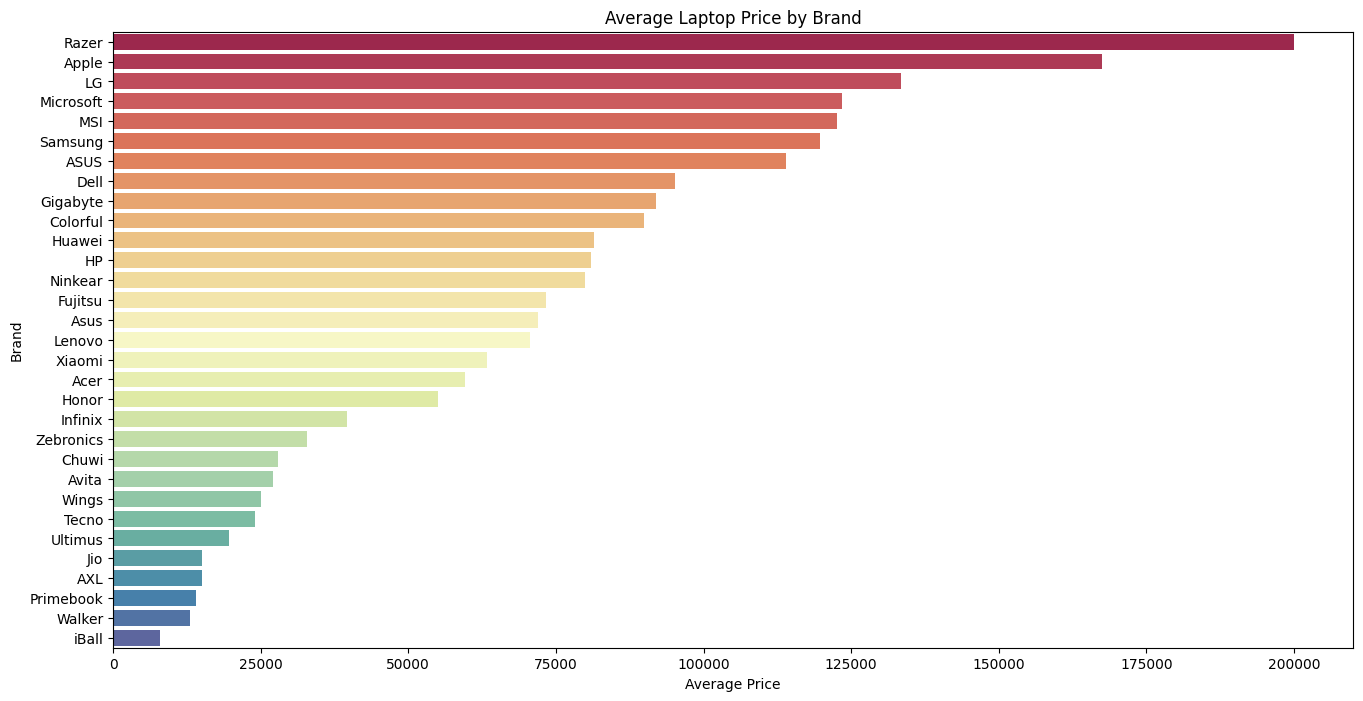

In [ ]:
# Відображення середньої ціни продукції кожного виробника

import matplotlib.pyplot as plt
import seaborn as sns

mean_price_by_brand = df.groupby('Brand')['Price'].mean().reset_index()
mean_price_by_brand = mean_price_by_brand.sort_values(by = 'Price', ascending = False)

plt.figure(figsize = (16, 8))
sns.barplot(x = 'Price', y = 'Brand', data = mean_price_by_brand, palette = 'Spectral')
plt.title('Average Laptop Price by Brand')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

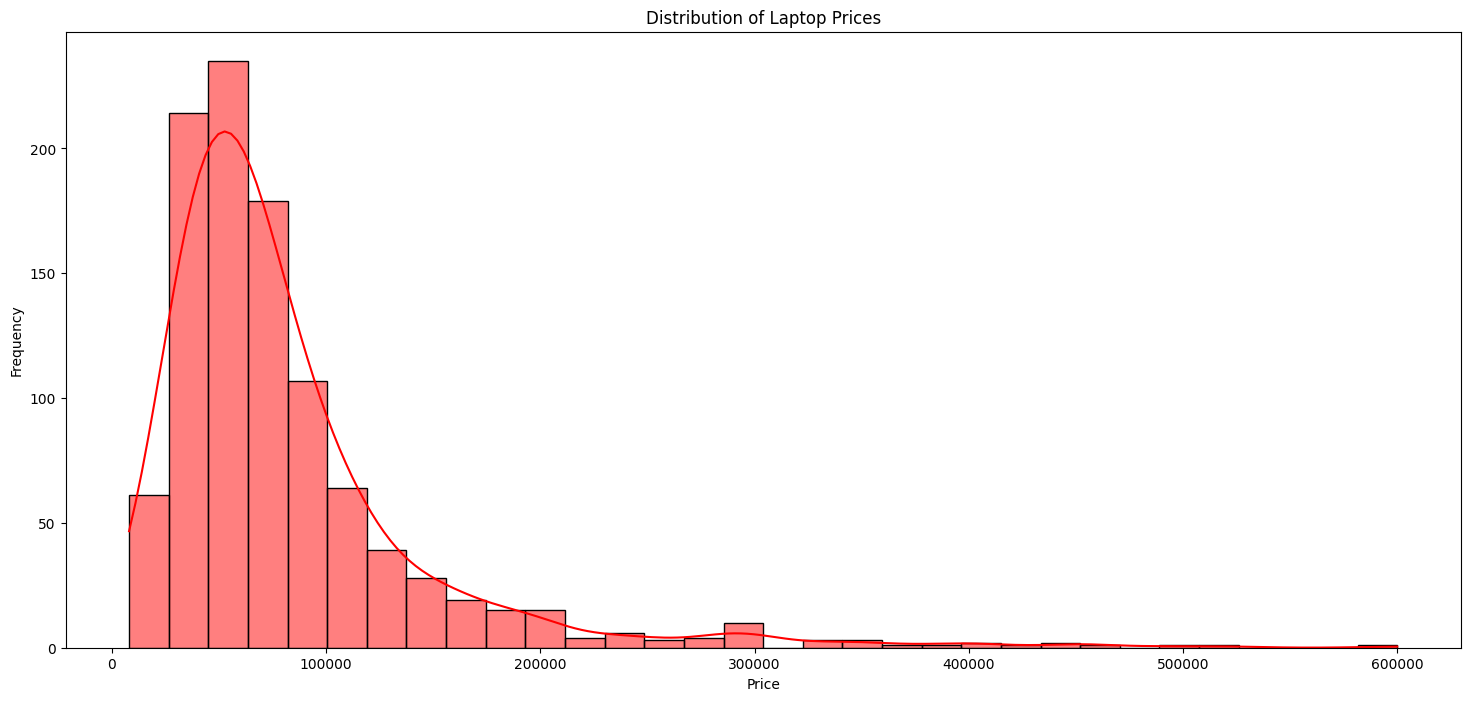

In [ ]:
# Відображення гістограми цін

plt.figure(figsize = (18, 8))
sns.histplot(df['Price'], bins = 32, kde = True, color = 'red')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

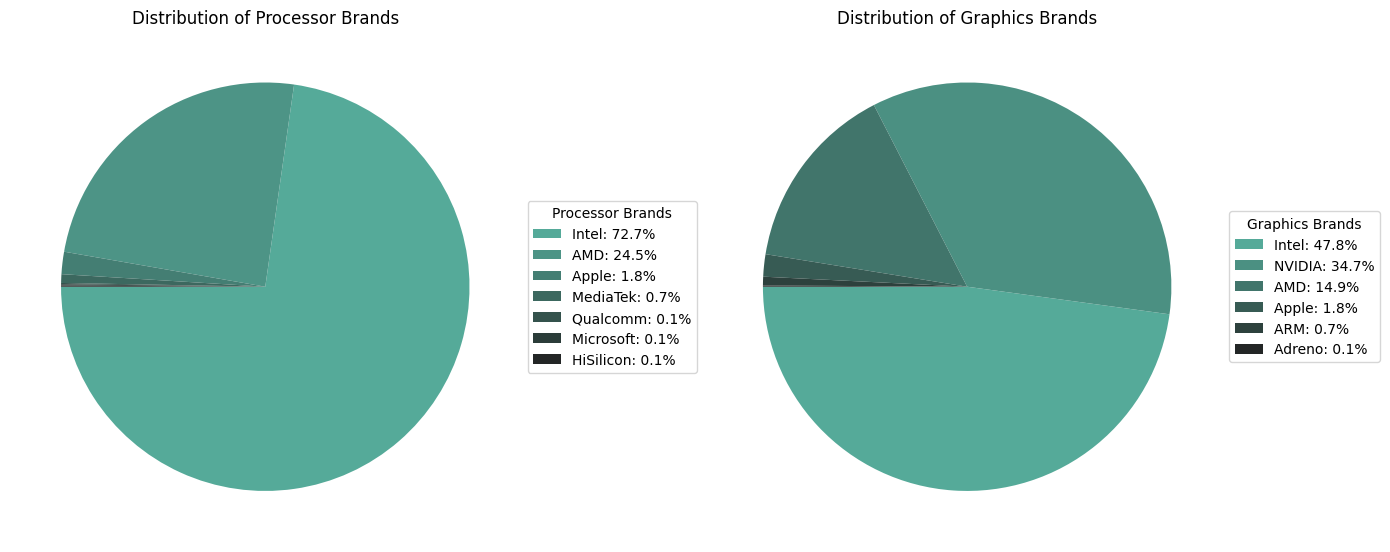

In [ ]:
# Відображення кругових діаграм виробників процесорів та відеоядер

processor_brand_counts = df['Processor_brand'].value_counts()
graphics_brand_counts = df['Graphics_brand'].value_counts()

processor_labels = [f'{brand}: {count / sum(processor_brand_counts) * 100:.1f}%' for brand, count in zip(processor_brand_counts.index, processor_brand_counts)]
graphics_labels = [f'{brand}: {count / sum(graphics_brand_counts) * 100:.1f}%' for brand, count in zip(graphics_brand_counts.index, graphics_brand_counts)]

fig, axes = plt.subplots(1, 2, figsize = (14, 8))

colors_1 = sns.color_palette('dark:#5A9_r', 7)
wedges_processor = axes[0].pie(processor_brand_counts, colors = colors_1, startangle = 180)
axes[0].legend(wedges_processor[0], processor_labels, title = 'Processor Brands', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
axes[0].set_title('Distribution of Processor Brands')

colors_2 = sns.color_palette('dark:#5A9_r', 6)
wedges_graphics = axes[1].pie(graphics_brand_counts, colors = colors_2, startangle = 180)
axes[1].legend(wedges_graphics[0], graphics_labels, title = 'Graphics Brands', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
axes[1].set_title('Distribution of Graphics Brands')

plt.tight_layout()
plt.show()

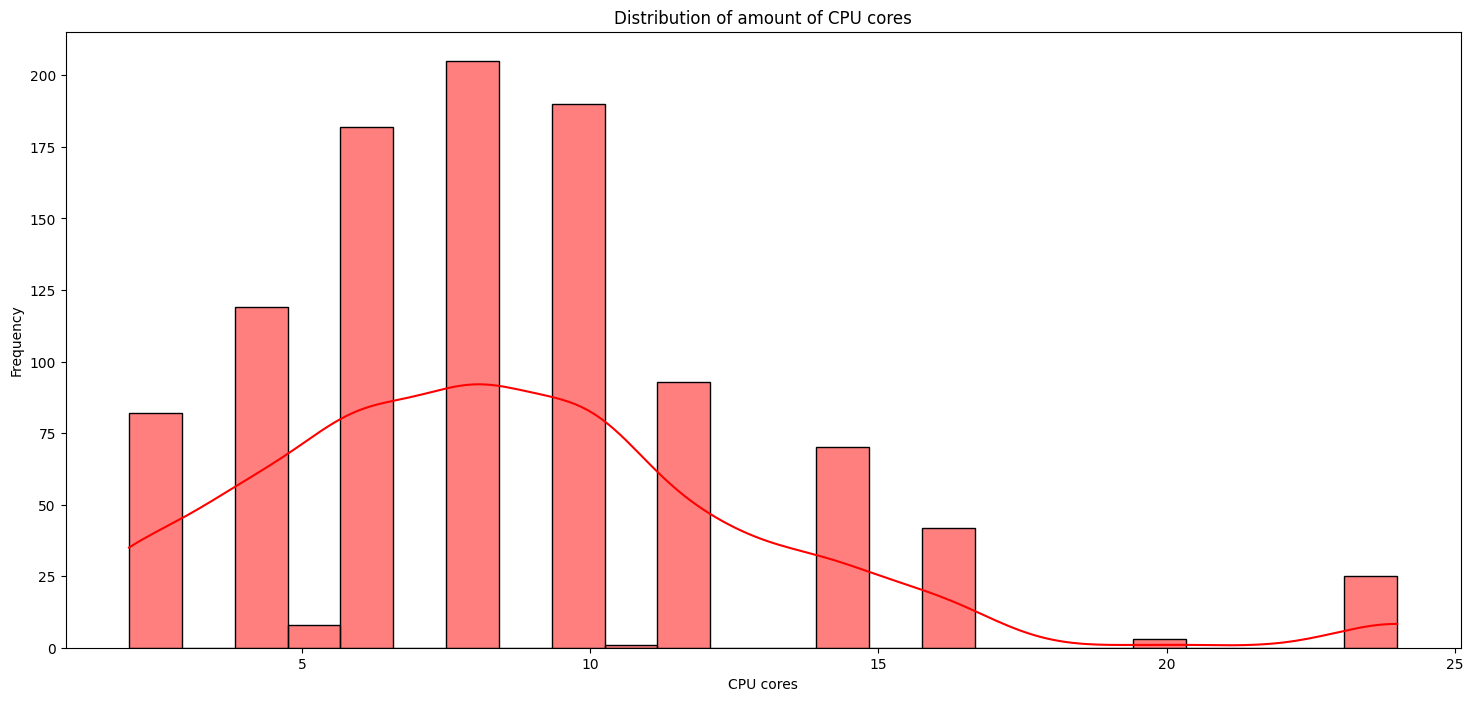

In [ ]:
# Відображення гістограми кількості ядер процесора

plt.figure(figsize = (18, 8))
sns.histplot(df['Core_per_processor'], bins = 24, kde = True, color = 'red')
plt.title('Distribution of amount of CPU cores')
plt.xlabel('CPU cores')
plt.ylabel('Frequency')
plt.show()

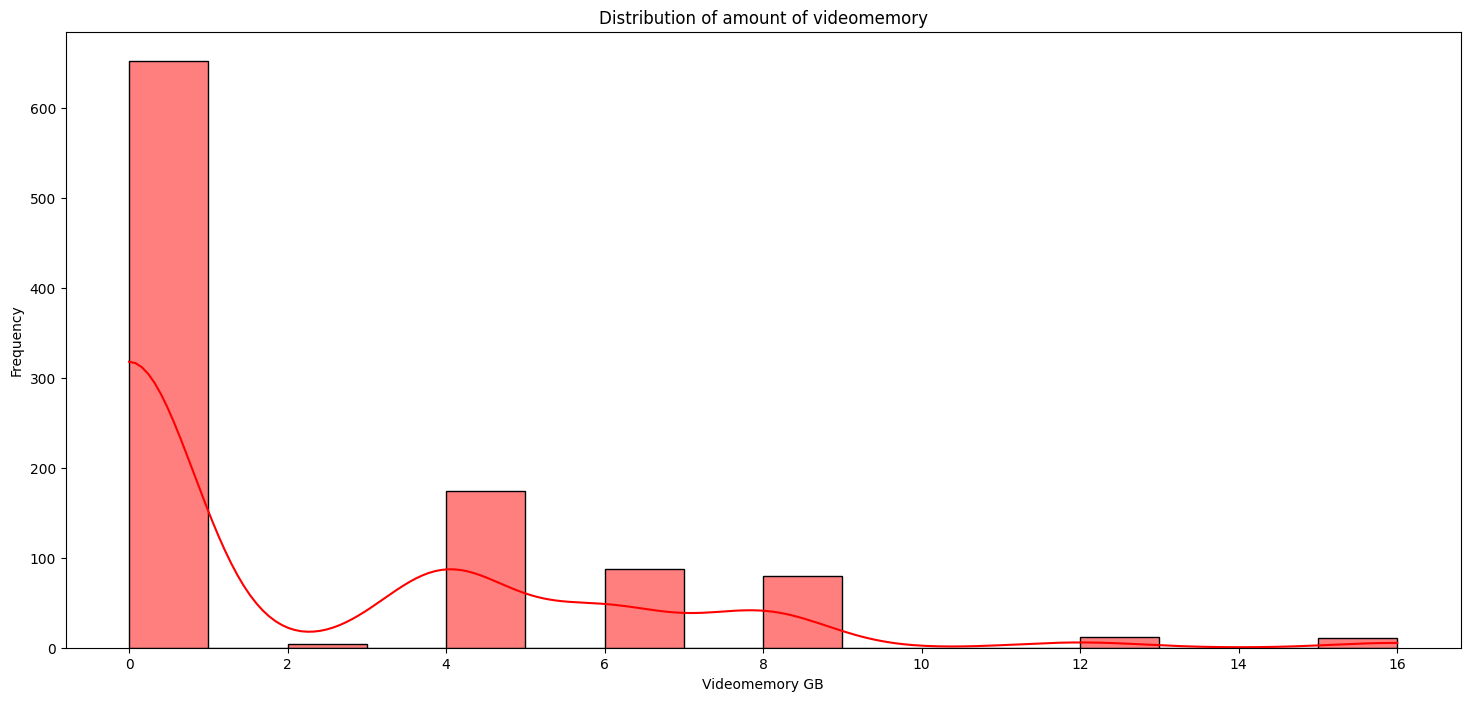

In [ ]:
# Відображення гістограми об'єму відеопам'яті

plt.figure(figsize = (18, 8))
sns.histplot(df['Graphics_GB'], bins = 16, kde = True, color = 'red')
plt.title('Distribution of amount of videomemory')
plt.xlabel('Videomemory GB')
plt.ylabel('Frequency')
plt.show()

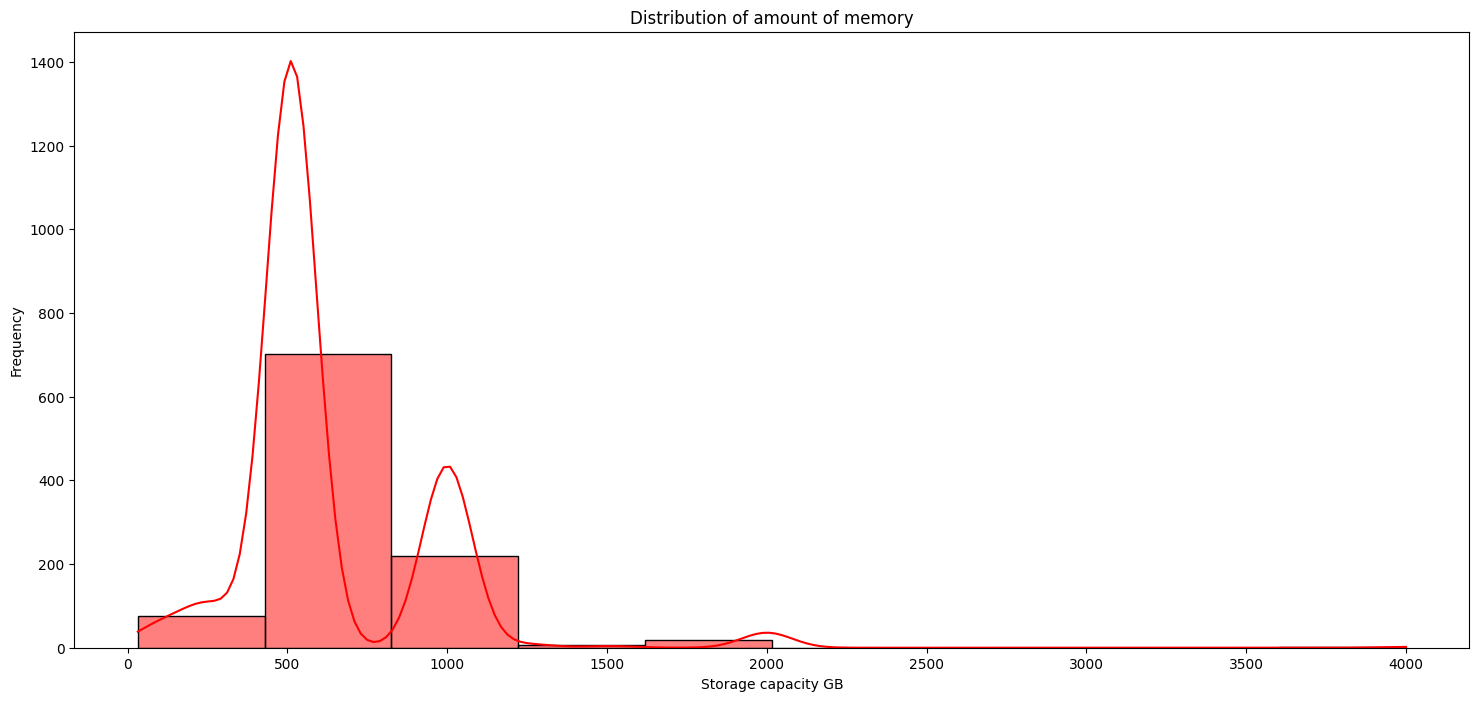

In [ ]:
# Відображення гістограми об'єму накопичувача

plt.figure(figsize = (18, 8))
sns.histplot(df['Storage_capacity_GB'], bins = 10, kde = True, color = 'red')
plt.title('Distribution of amount of memory')
plt.xlabel('Storage capacity GB')
plt.ylabel('Frequency')
plt.show()

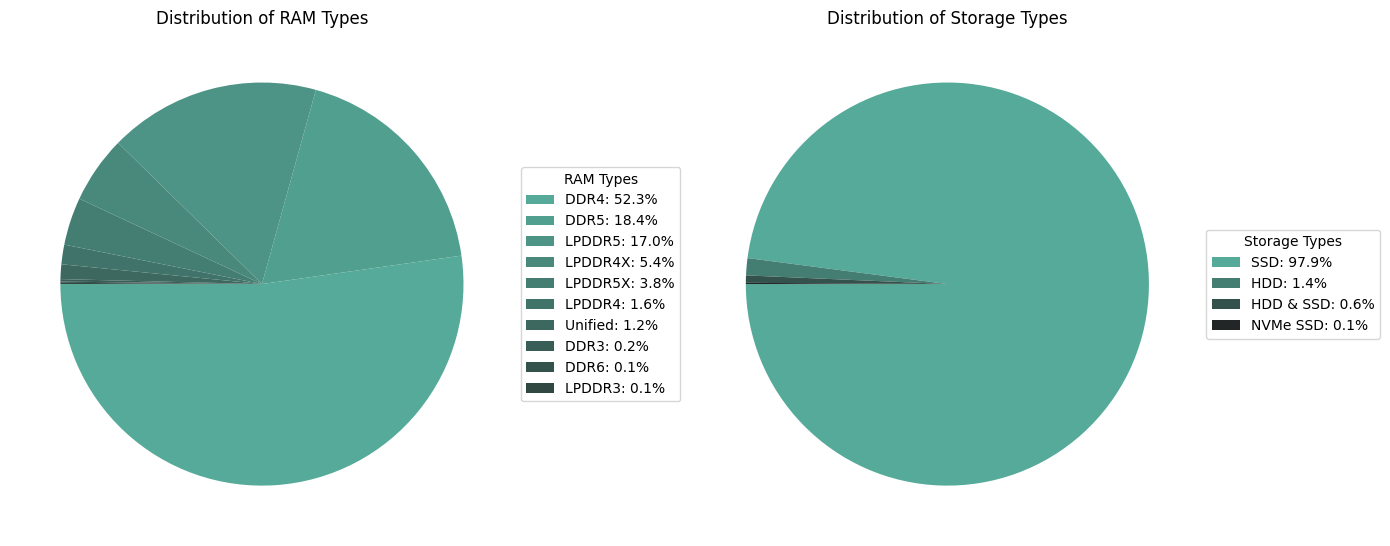

In [ ]:
# Відображення кругових діаграм типів ОЗП та накопичувачів

ram_type_counts = df['RAM_type'].value_counts()
storage_type_counts = df['Storage_type'].value_counts()

ram_labels = [f'{ram}: {count / sum(ram_type_counts) * 100:.1f}%' for ram, count in zip(ram_type_counts.index, ram_type_counts)]
storage_labels = [f'{storage}: {count / sum(storage_type_counts) * 100:.1f}%' for storage, count in zip(storage_type_counts.index, storage_type_counts)]

fig, axes = plt.subplots(1, 2, figsize = (14, 8))

colors_1 = sns.color_palette('dark:#5A9_r', 13)
wedges_ram = axes[0].pie(ram_type_counts, colors = colors_1, startangle = 180)
axes[0].legend(wedges_ram[0], ram_labels, title = 'RAM Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
axes[0].set_title('Distribution of RAM Types')

colors_2 = sns.color_palette('dark:#5A9_r', 4)
wedges_storage = axes[1].pie(storage_type_counts, colors = colors_2, startangle = 180)
axes[1].legend(wedges_storage[0], storage_labels, title = 'Storage Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
axes[1].set_title('Distribution of Storage Types')

plt.tight_layout()
plt.show()

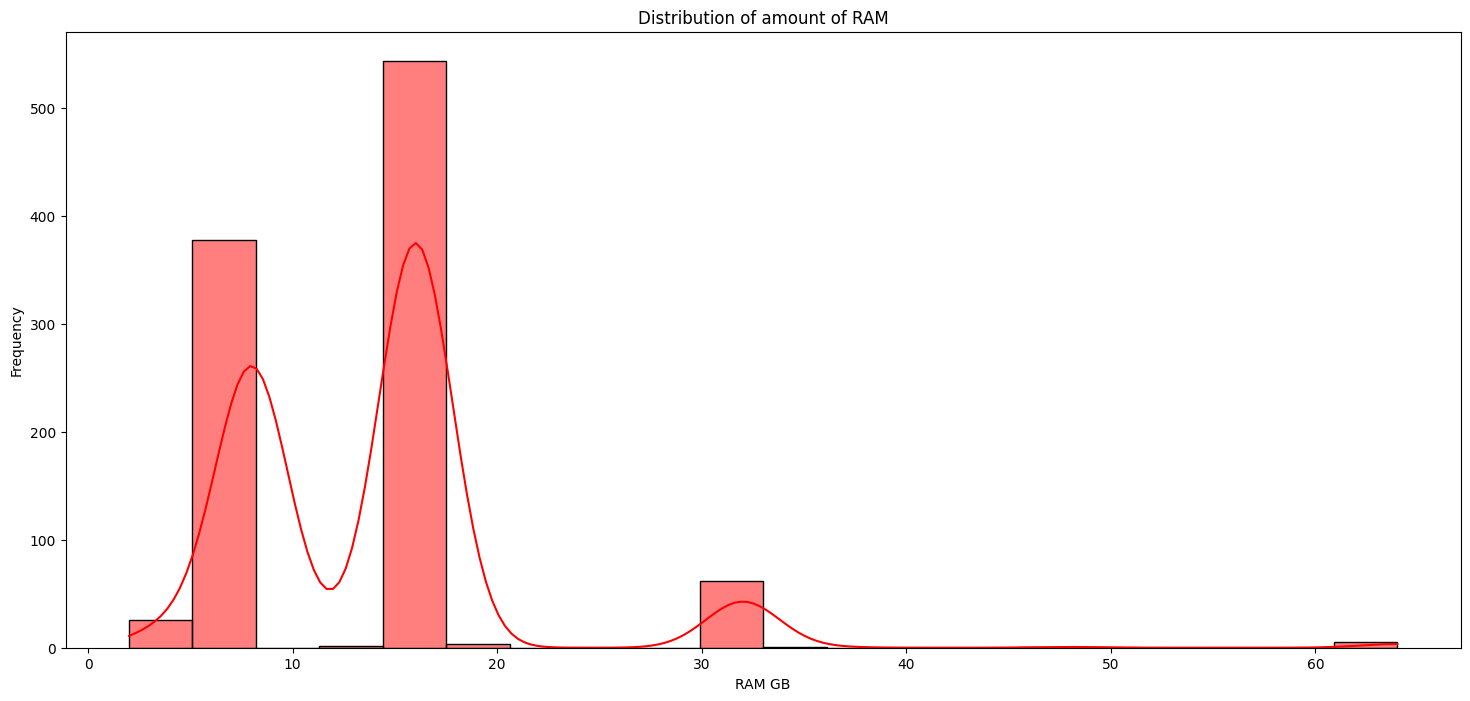

In [ ]:
# Відображення гістограми об'єму оперативної пам'яті

plt.figure(figsize = (18, 8))
sns.histplot(df['RAM_GB'], bins = 20, kde = True, color = 'red')
plt.title('Distribution of amount of RAM')
plt.xlabel('RAM GB')
plt.ylabel('Frequency')
plt.show()

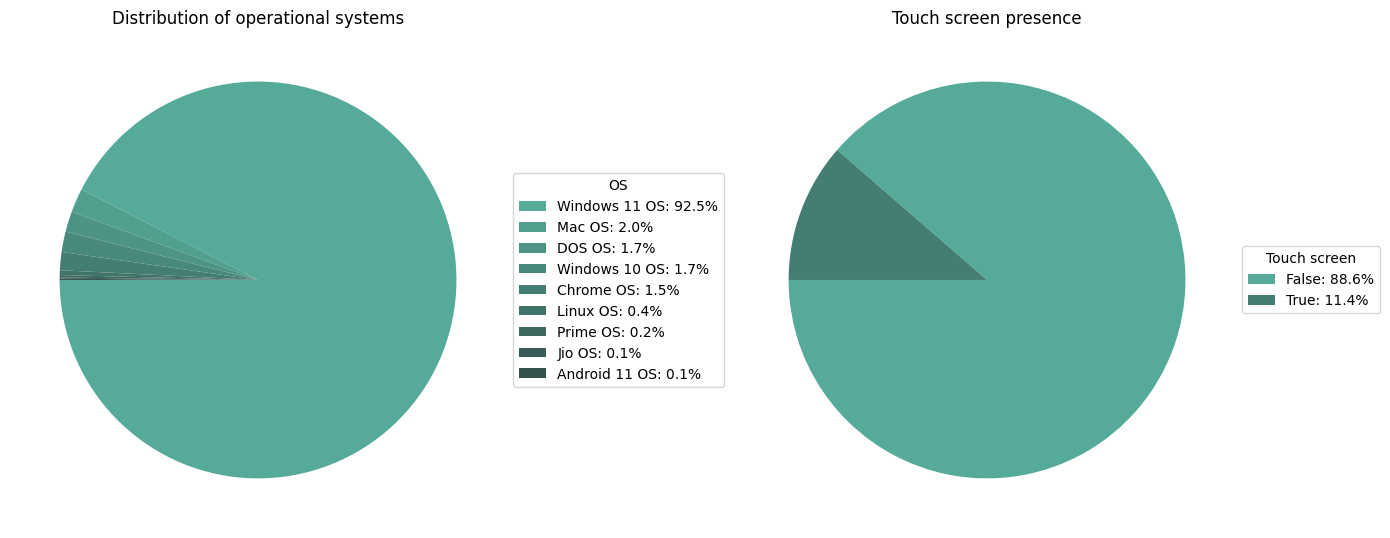

In [ ]:
# Відображення кругових діаграм операційної системи та наявності сенсорного екрану

os_type_counts = df['Operating_system'].value_counts()
touch_screen_bool_counts = df['Touch_screen'].value_counts()

os_type_labels = [f'{os}: {count / sum(os_type_counts) * 100:.1f}%' for os, count in zip(os_type_counts.index, os_type_counts)]
touch_screen_bool_labels = [f'{storage}: {count / sum(touch_screen_bool_counts) * 100:.1f}%' for storage, count in zip(touch_screen_bool_counts.index, touch_screen_bool_counts)]

fig, axes = plt.subplots(1, 2, figsize = (14, 8))

colors_1 = sns.color_palette('dark:#5A9_r', 13)
wedges_os = axes[0].pie(os_type_counts, colors = colors_1, startangle = 180)
axes[0].legend(wedges_os[0], os_type_labels, title = 'OS', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
axes[0].set_title('Distribution of operational systems')

colors_2 = sns.color_palette('dark:#5A9_r', 4)
wedges_storage = axes[1].pie(touch_screen_bool_counts, colors = colors_2, startangle = 180)
axes[1].legend(wedges_storage[0], touch_screen_bool_labels, title = 'Touch screen', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
axes[1].set_title('Touch screen presence')

plt.tight_layout()
plt.show()

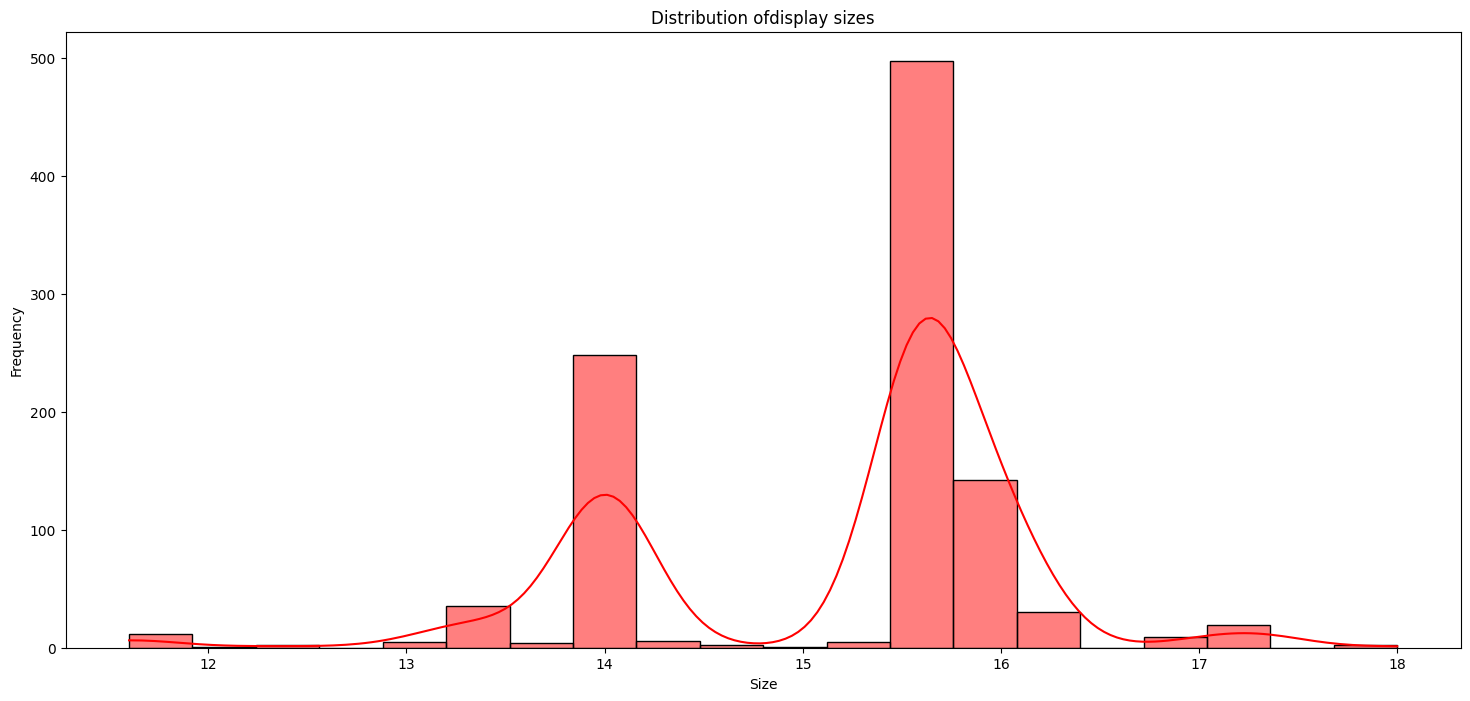

In [ ]:
# Відображення гістограми розміру екрану

plt.figure(figsize = (18, 8))
sns.histplot(df['Display_size_inches'], bins = 20, kde = True, color = 'red')
plt.title('Distribution ofdisplay sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

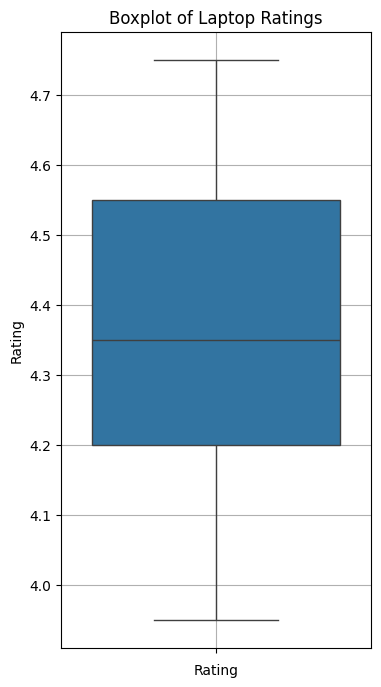

In [ ]:
# Боксплот оцінок для ноутбуків

fig, ax = plt.subplots(figsize = (4, 8))
sns.boxplot(df['Rating'])
ax.set_title('Boxplot of Laptop Ratings')
ax.set_xlabel('Rating')
ax.grid(True)
plt.show()

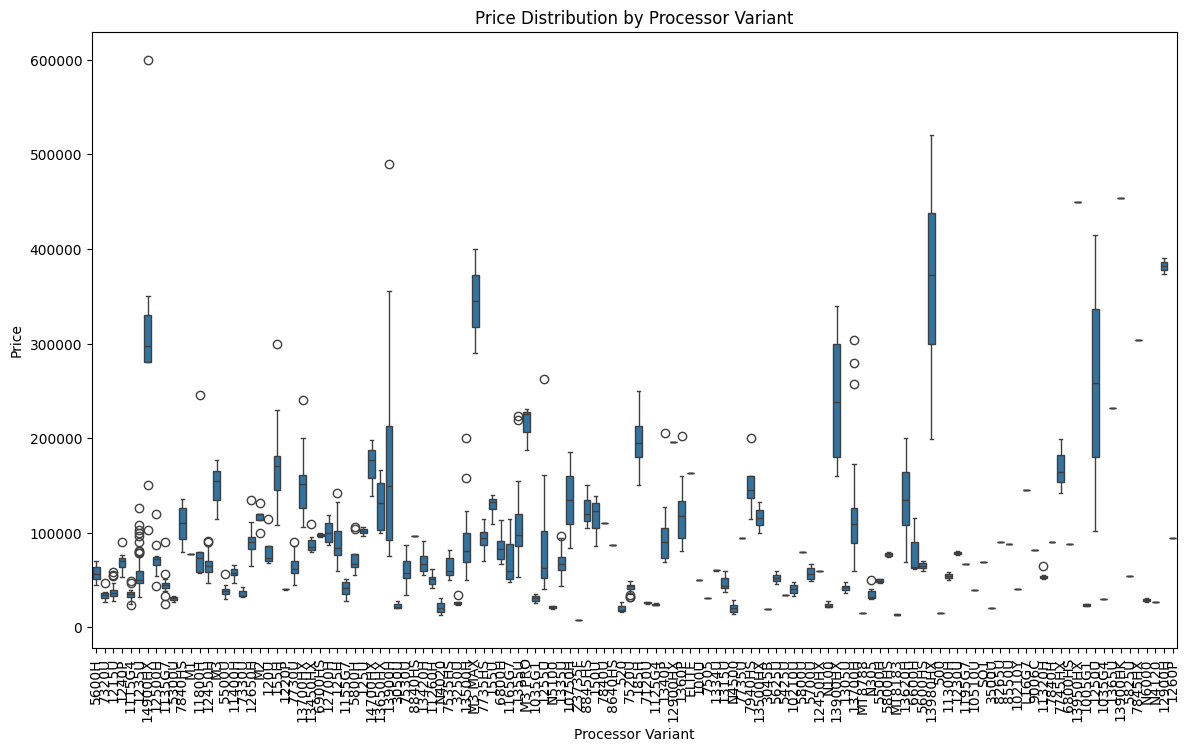

In [ ]:
# Боксплот моделей процесорів

plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Processor_variant', y = 'Price', data = df)
plt.title('Price Distribution by Processor Variant')
plt.xlabel('Processor Variant')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

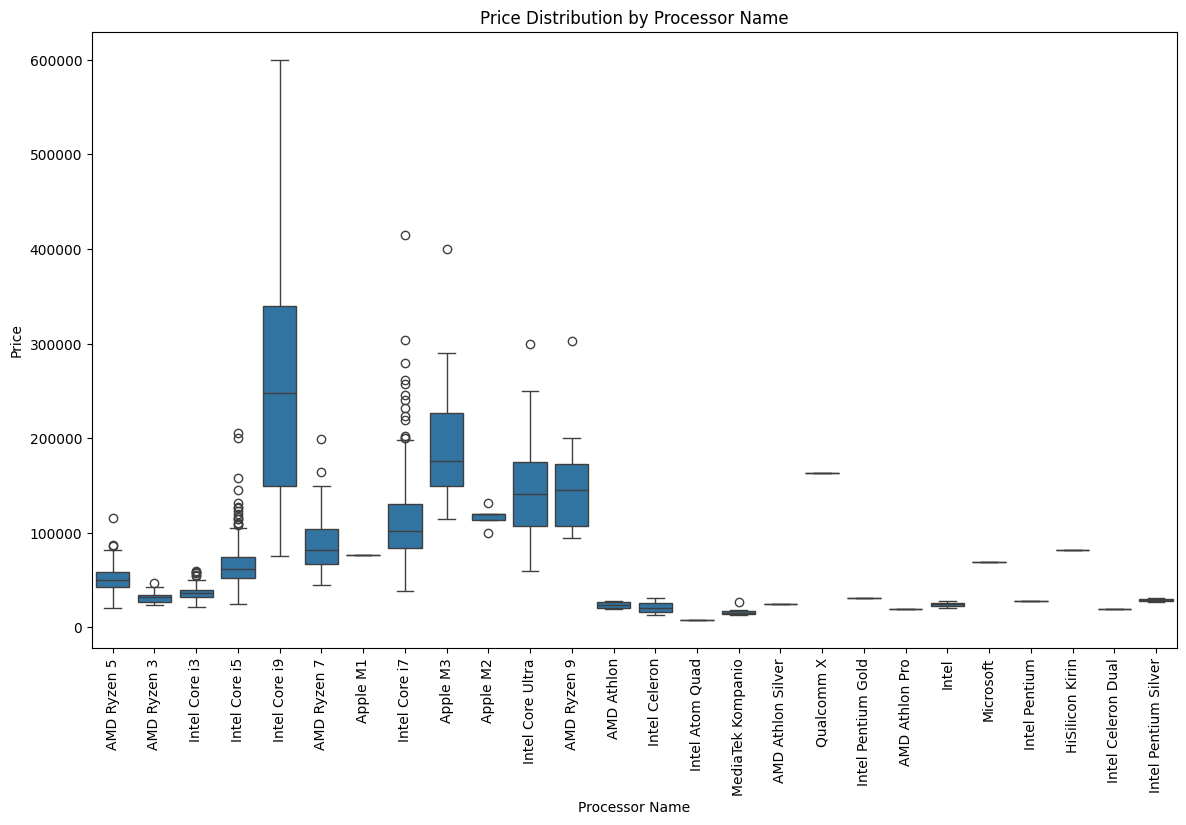

In [ ]:
# Боксплот лінійок процесорів

plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Processor_name', y = 'Price', data = df)
plt.title('Price Distribution by Processor Name')
plt.xlabel('Processor Name')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

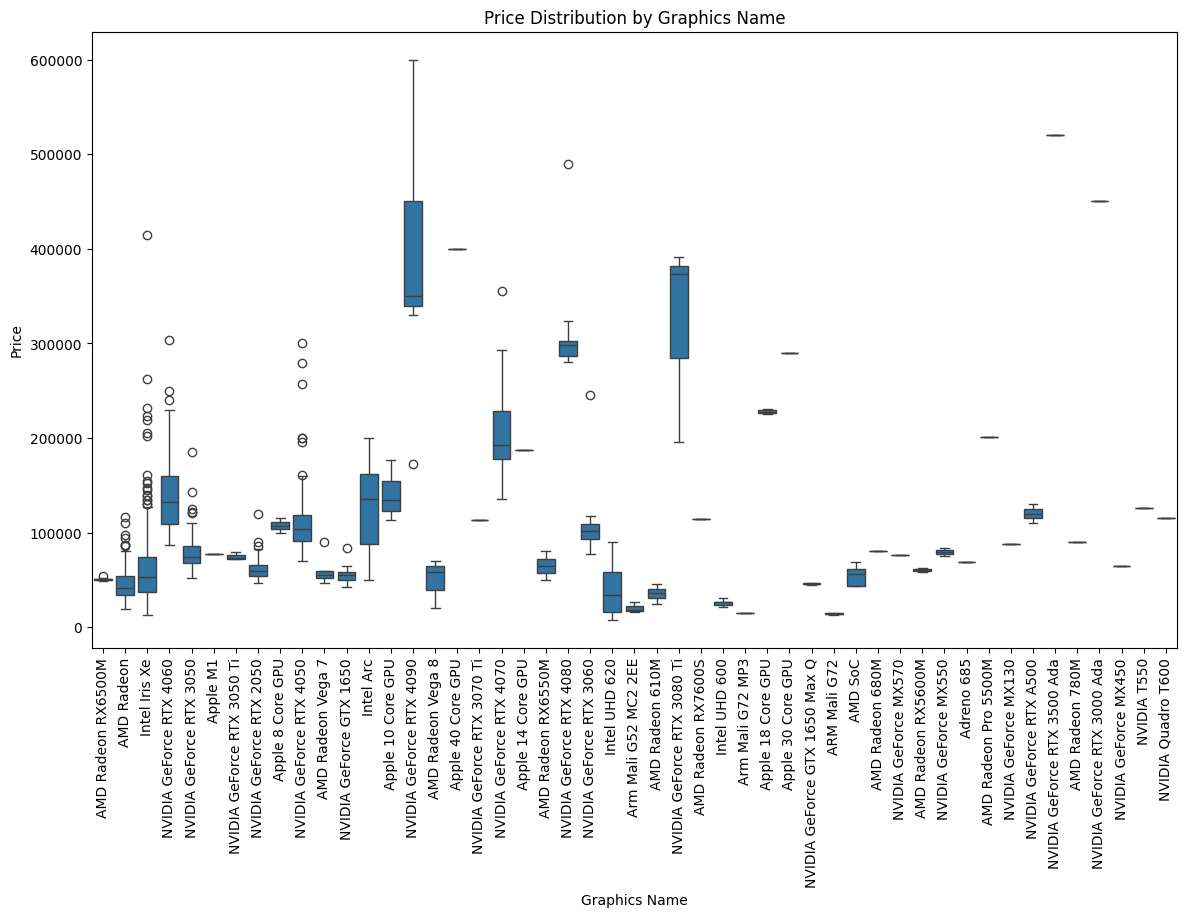

In [ ]:
# Боксплот лінійок графічних процесорів

plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Graphics_name', y = 'Price', data = df)
plt.title('Price Distribution by Graphics Name')
plt.xlabel('Graphics Name')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

## Кореляційний аналіз

Наступним етапом дослідимо кореляцію між ціною та іншими числовими показниками. Це потрібно для визначення потенційних числових предикторів ціни на ноутбуки.

Для початку виведемо значення коефіцієнтів кореляції Пірсона та відобразимо heatmap

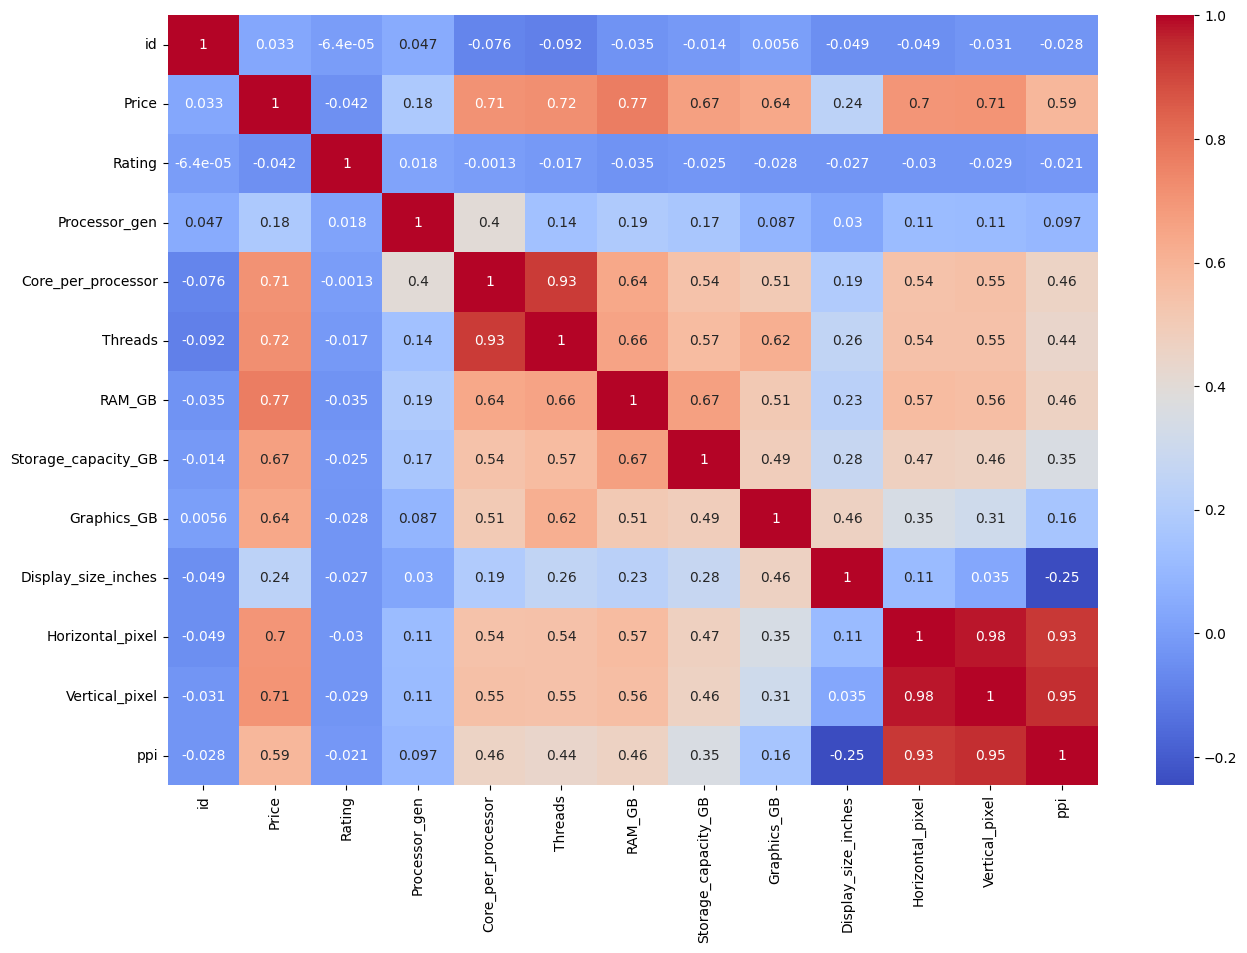

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df[df.select_dtypes(include=[np.number]).columns].corr(), annot = True, cmap = 'coolwarm')
plt.show()

Помітні наступні потенційні предиктори ціни:

*   Core_per_processor
*   Threads
*   RAM_GB
*   Storage_capacity_GB
*   Graphics_GB
*   Horizontal_pixel
*   Vertical_pixel
*   ppi

Перевіримо ці ознаки на нормальність розподілу

In [ ]:
from scipy.stats import shapiro

predictors = ['Core_per_processor', 'Threads', 'RAM_GB', 'Storage_capacity_GB', 'Graphics_GB', 'Horizontal_pixel', 'Vertical_pixel', 'ppi']

for predictor in predictors:
  print(f"\nAnalyzing predictor: {predictor}")
  stat, p_value = shapiro(df[predictor])
  print(f"Shapiro test: statistic = {stat}, p-value = {p_value}")


Analyzing predictor: Core_per_processor
Shapiro test: statistic = 0.9154046177864075, p-value = 2.0561309240343755e-23

Analyzing predictor: Threads
Shapiro test: statistic = 0.917628824710846, p-value = 3.9710731009741047e-23

Analyzing predictor: RAM_GB
Shapiro test: statistic = 0.6817833185195923, p-value = 5.369887819169845e-40

Analyzing predictor: Storage_capacity_GB
Shapiro test: statistic = 0.6395811438560486, p-value = 8.550723229310034e-42

Analyzing predictor: Graphics_GB
Shapiro test: statistic = 0.6878281831741333, p-value = 1.007389262107718e-39

Analyzing predictor: Horizontal_pixel
Shapiro test: statistic = 0.6342617273330688, p-value = 5.2212380780742684e-42

Analyzing predictor: Vertical_pixel
Shapiro test: statistic = 0.6966042518615723, p-value = 2.5565485364926968e-39

Analyzing predictor: ppi
Shapiro test: statistic = 0.7369532585144043, p-value = 2.508091299284713e-37


Дані розподілені не нормально. Здогадку про потенційні предиктори перевіримо за допомогою коефіцієнту Спірмена

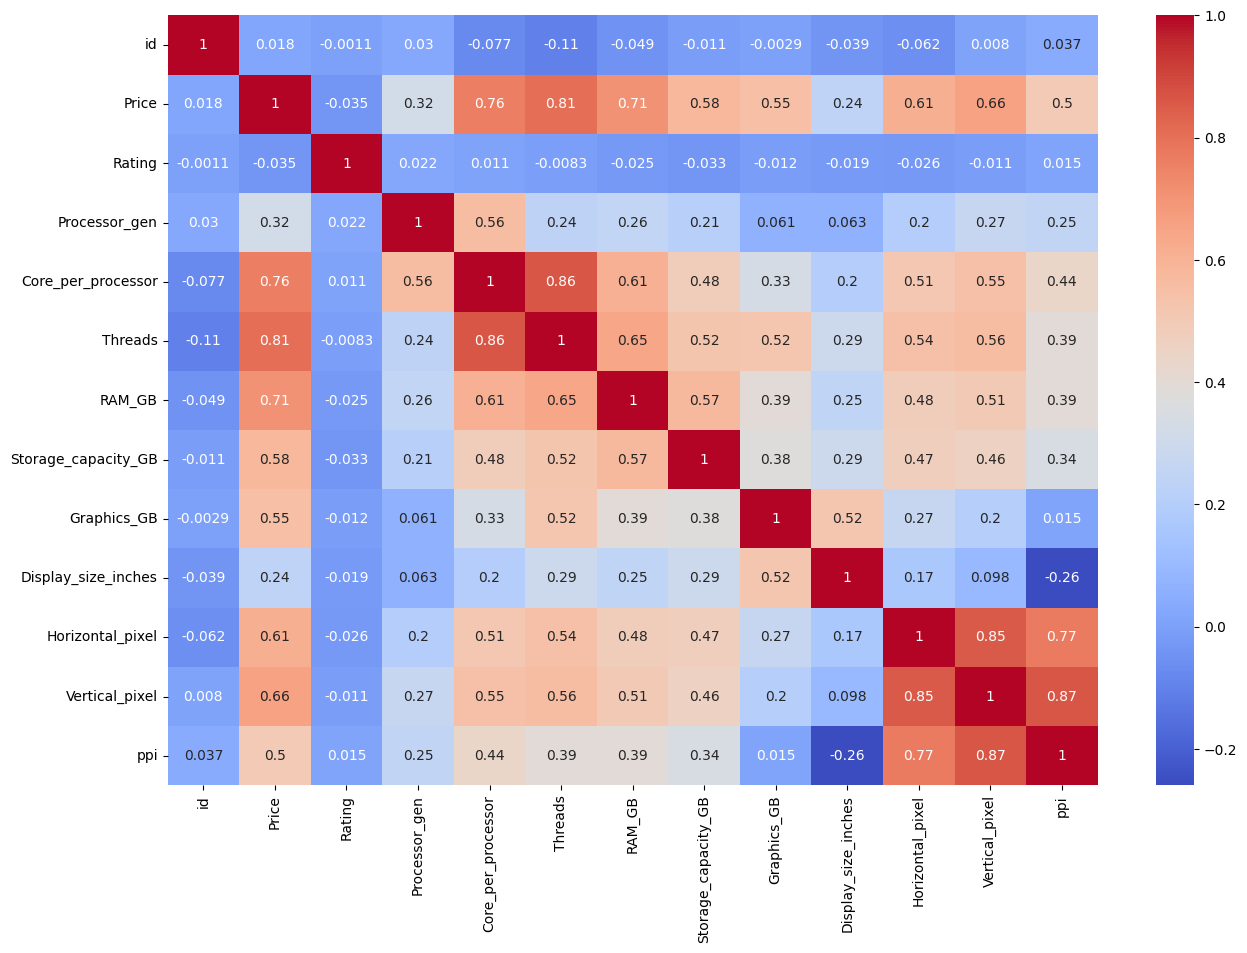

In [ ]:
spearman_corr_matrix = df[df.select_dtypes(include=[np.number]).columns].corr(method = 'spearman')

plt.figure(figsize = (15, 10))
sns.heatmap(spearman_corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

Відобразимо графіки розсіювання для ціни та потенційних предикторів

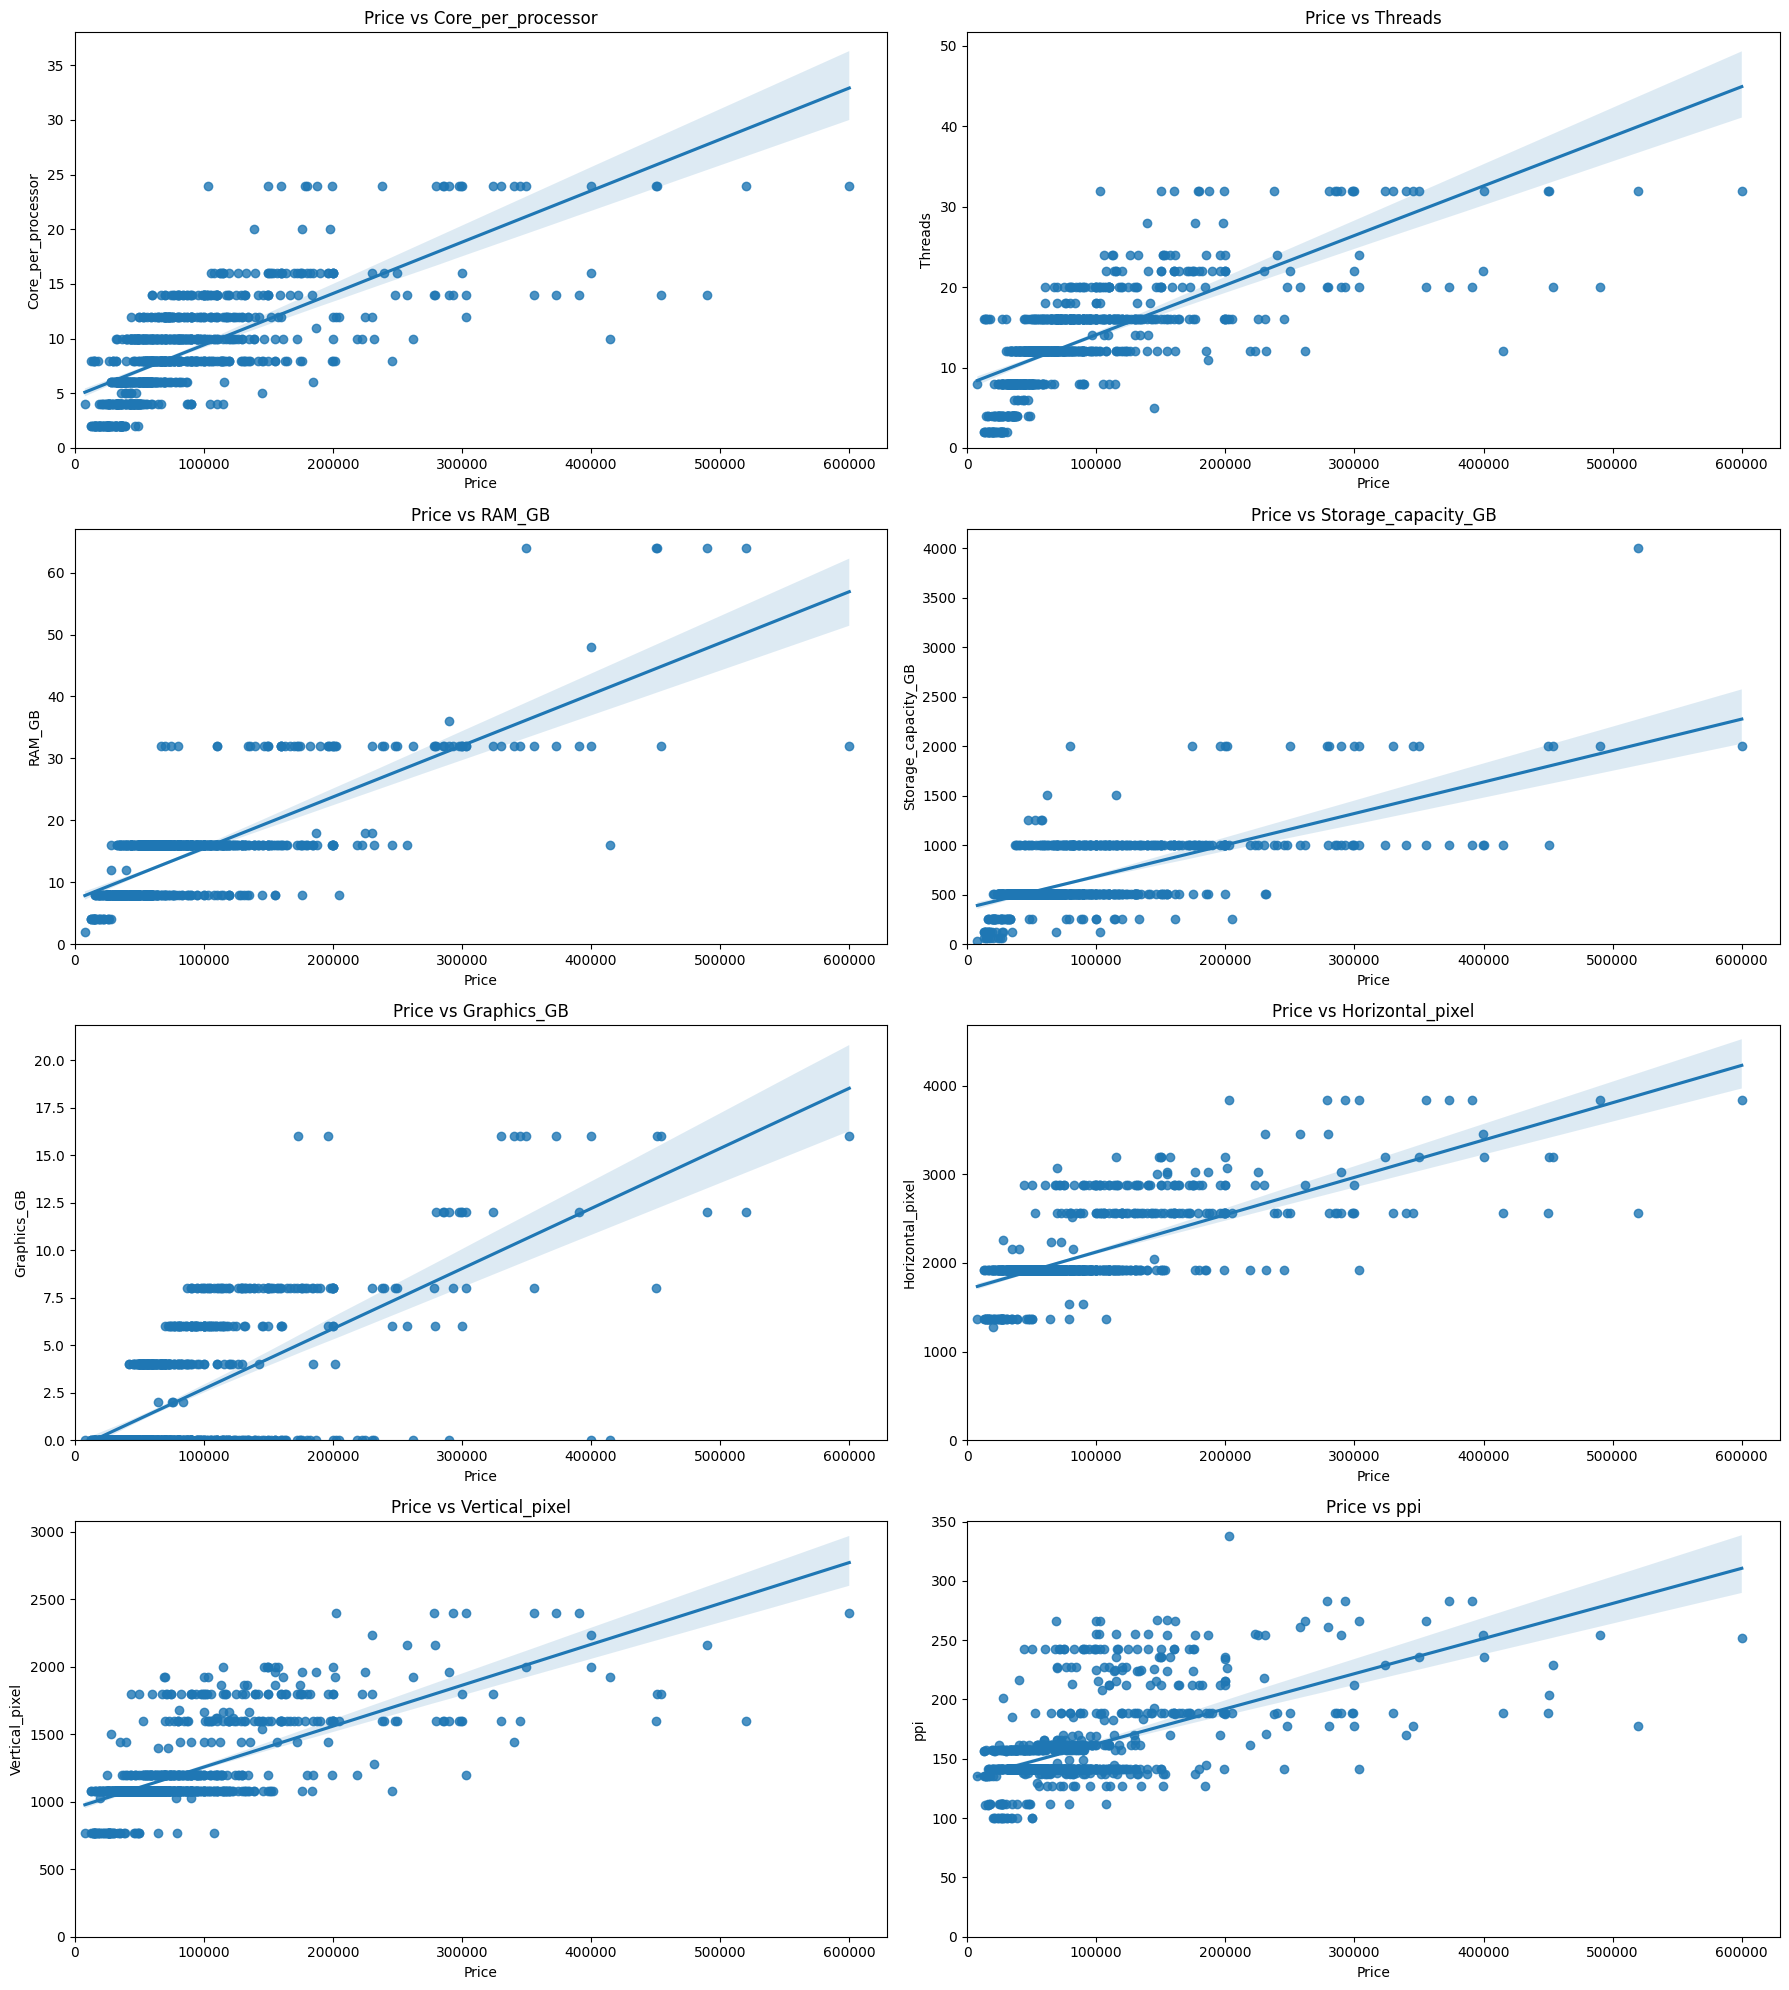

In [ ]:
plt.figure(figsize = (18, 20))

for i, predictor in enumerate(predictors, 1):
  plt.subplot(4, 2, i)
  sns.regplot(x = 'Price', y = predictor, data = df)
  plt.title(f'Price vs {predictor}')
  plt.ylim(0,)
  plt.xlim(0,)

plt.tight_layout()
plt.show()

Висновок можна зробити наступний:

*   Кореляція між 'Price' та 'Core_per_processor', 'Threads', 'RAM_GB' сильна
*   Кореляція між 'Price' та 'Storage_capacity_GB', 'Graphics_GB', 'Horizontal_pixel', 'Vertical_pixel' помітна
*   Кореляція між 'Price' та 'ppi' помірна


## Дисперсійний аналіз

Після визначення потенційних числових предикторів ціни на ноутбук, слід визначити категоріальні предиктори.
Для цього дослідимо дисперсію між ціною та іншими нечисловими показниками.

In [ ]:
from scipy.stats import kruskal

non_numeric_columns = df.select_dtypes(exclude = [np.number]).columns
kruskal_results = []

for column in non_numeric_columns:
  groups = [group['Price'].values for name, group in df.groupby(column)]
  if len(groups) > 1:
    h, p = kruskal(*groups)
    kruskal_results.append((column, h, p))

kruskal_df = pd.DataFrame(kruskal_results, columns = ['Feature', 'H_statistic', 'p_value'])
kruskal_df = kruskal_df.set_index('Feature')

print(kruskal_df.sort_values(by='H_statistic', ascending=False))

                     H_statistic        p_value
Feature                                        
Name                 1019.000000   4.941086e-01
Processor_variant     888.820201  1.983983e-115
Processor_name        740.309818  4.545905e-140
Graphics_name         542.856813   5.248217e-85
RAM_type              398.561313   2.777476e-80
Graphics_brand        324.795907   4.652696e-68
Brand                 239.137874   1.869251e-34
Operating_system      105.940749   2.594336e-19
Graphics_integrated    82.000614   1.360444e-19
Touch_screen           76.411183   2.303431e-18
Processor_brand        68.915485   6.822289e-13
Storage_type           37.591181   3.449734e-08


Висновок можна зробити наступний:

*   Ознаки "Name" та "Processor_variant" для аналізу не підходять, адже мають багато значень, що дуже рідко зустрічаються.
*   Ознаки "Graphics_integrated", "Touch_screen", "Processor_brand", "Storage_type" явно не підходять для аналізу через невелику різницю між групами
*   Ознаки "Processor_name", "Graphics_name", "RAM_type", "Graphics_brand" та "Brand" можуть стати чудовими предикторами
*   Ознака "Operating_system" має нижчі показники H_statistic і потенційно може бути предиктором



## Факторний аналіз

Для зменшення кількості числових предикторів використаємо факторний аналіз

Знайдемо оптимальну кількість факторів. Судячи з цього графіка, слід обрати 1-2 фактори

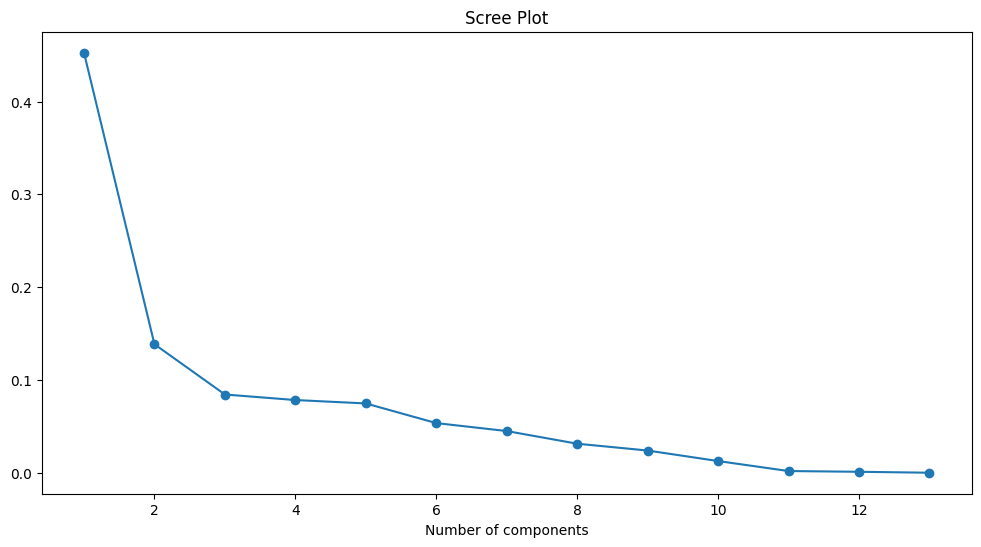

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[df.select_dtypes(include=[np.number]).columns])

pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize = (12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.show()

Виконаємо факторний аналіз з 3 факторами

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=ce13d66f5257a5a07b2e78e4b0b4222fbae1a6468c6989430638b7b8cca56a2b
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index = df.select_dtypes(include = [np.number]).columns, columns=[f'Factor{i + 1}' for i in range(loadings.shape[1])])
print(loadings_df)

                      Factor1   Factor2   Factor3
id                  -0.013976 -0.052738 -0.004384
Price                0.539530  0.444661  0.579417
Rating              -0.029543  0.024078 -0.052533
Processor_gen        0.032482  0.342945  0.000427
Core_per_processor   0.278271  0.941977  0.267739
Threads              0.312166  0.703479  0.456584
RAM_GB               0.412262  0.445816  0.511621
Storage_capacity_GB  0.319207  0.361198  0.527059
Graphics_GB          0.126510  0.296222  0.722183
Display_size_inches -0.137249  0.046317  0.602014
Horizontal_pixel     0.911834  0.206739  0.251260
Vertical_pixel       0.935684  0.234432  0.186565
ppi                  0.979855  0.232828 -0.093314


Опишемо отримані фактори:

*   Фактор 1 - ppi, Vertical_pixel, Horizontal_pixel. Описує характеристики екрану
*   Фактор 2 - Core_per_processor, Threads. Описує характеристики компонентів
*   Фактор 3 - RAM_GB, Storage_capacity_GB, Graphics_GB. Описує характеристики пам'яті



## Регресійний аналіз

Для передбачення ціни на ноутбук слід обрати декілька регресійних моделей, дослідити та оцінити їх, за можливості покращити

Розробимо наступний план дій:

*   Побудуємо моделі для аналізу
*   Побудуємо візуалізації для оцінки моделей
*   Порахуємо значення R^2 та RMSE



Імпортуємо необхідні бібліотеки

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

Розділимо дані на навчальні та тестові. В якості тестових - 40% датафрейму

In [ ]:
selected_columns = ['Threads', 'Vertical_pixel', 'RAM_GB', 'Graphics_GB', 'RAM_type', 'Brand', 'Processor_name', 'Graphics_brand']

x = df[selected_columns]
y = df['Price']

categorical_cols = x.select_dtypes(include = ['object']).columns
onehot_encoder = OneHotEncoder(sparse = False, drop = 'first')

x_encoded = pd.DataFrame(onehot_encoder.fit_transform(x[categorical_cols]), columns = onehot_encoder.get_feature_names_out(categorical_cols))
x_numeric = x.drop(columns = categorical_cols)
x_transformed = pd.concat([x_numeric.reset_index(drop = True), x_encoded.reset_index(drop = True)], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size = 0.4, random_state = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Лінійна регресія

В якості першої моделі оберемо лінійну регресію. Це базова модель, вона дуже проста у реалізації та інтерпретації.

Модель навчимо на 60% даних, оцінимо за допомогою RMSE, MAPE та R^2

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

MAPE = 0.20507357024092224
RMSE = 25128.30362838063
R^2 = 0.8630080019656385


Для візуалізації моделі множинної лінійної регресії використаємо діаграму розпроділу

<ipython-input-31-09059395dd27>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
<ipython-input-31-09059395dd27>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat_0, hist = False, color = "b", label = "

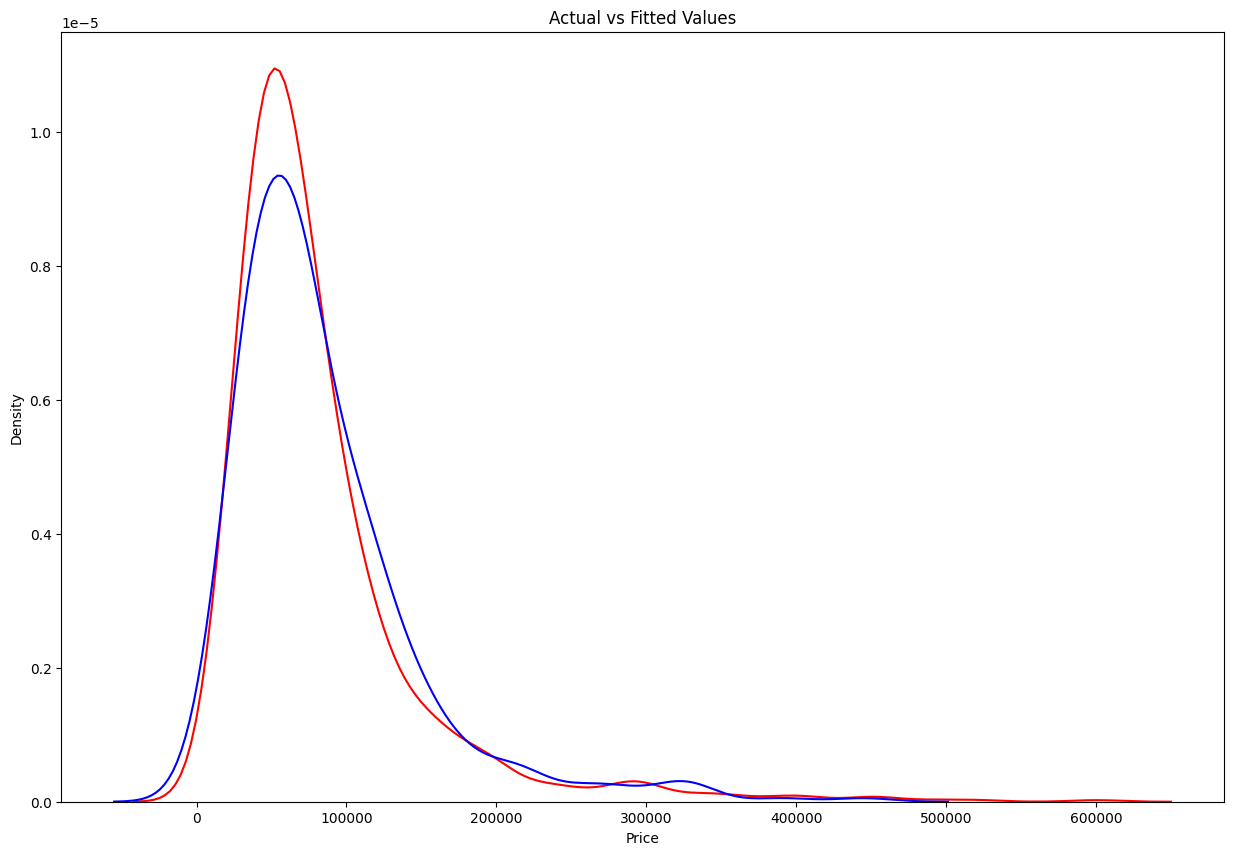

In [ ]:
Y_hat_0 = model_lr.predict(x_test)

plt.figure(figsize = (15, 10))

ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
sns.distplot(Y_hat_0, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values")
plt.xlabel("Price")

plt.show()
plt.close()

Висновок побудови моделі такий: лінійна регресія непогано справляється з передбаченням ціни на ноутбук.

Графік розподілу показує, що модель має значні неточності на деяких проміжках ціни. Спробуємо це виправити, обравши іншу модель

### Гребенева регресія

Гребенева регресія - це різновид лінійної регресії, яка характеризується меншою читливістю до мультиколінеарності та перенавчення. Ця модель використовує регуляризацію для покращення результатів. Спробуємо використати її

In [ ]:
ridge = Ridge()
ridge.fit(x_train, y_train)

ridge_y_pred = ridge.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
mape = mean_absolute_percentage_error(y_test, ridge_y_pred)
r2 = r2_score(y_test, ridge_y_pred)

print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}', '\n')

MAPE = 0.19526401292246587
RMSE = 24944.721773697747
R^2 = 0.8650023568590121 



Для візуалізації моделі гребеневої регресії також використаємо діаграму розпроділу

<ipython-input-30-8d83cbf865f6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
<ipython-input-30-8d83cbf865f6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat_1, hist = False, color = "b", label = "

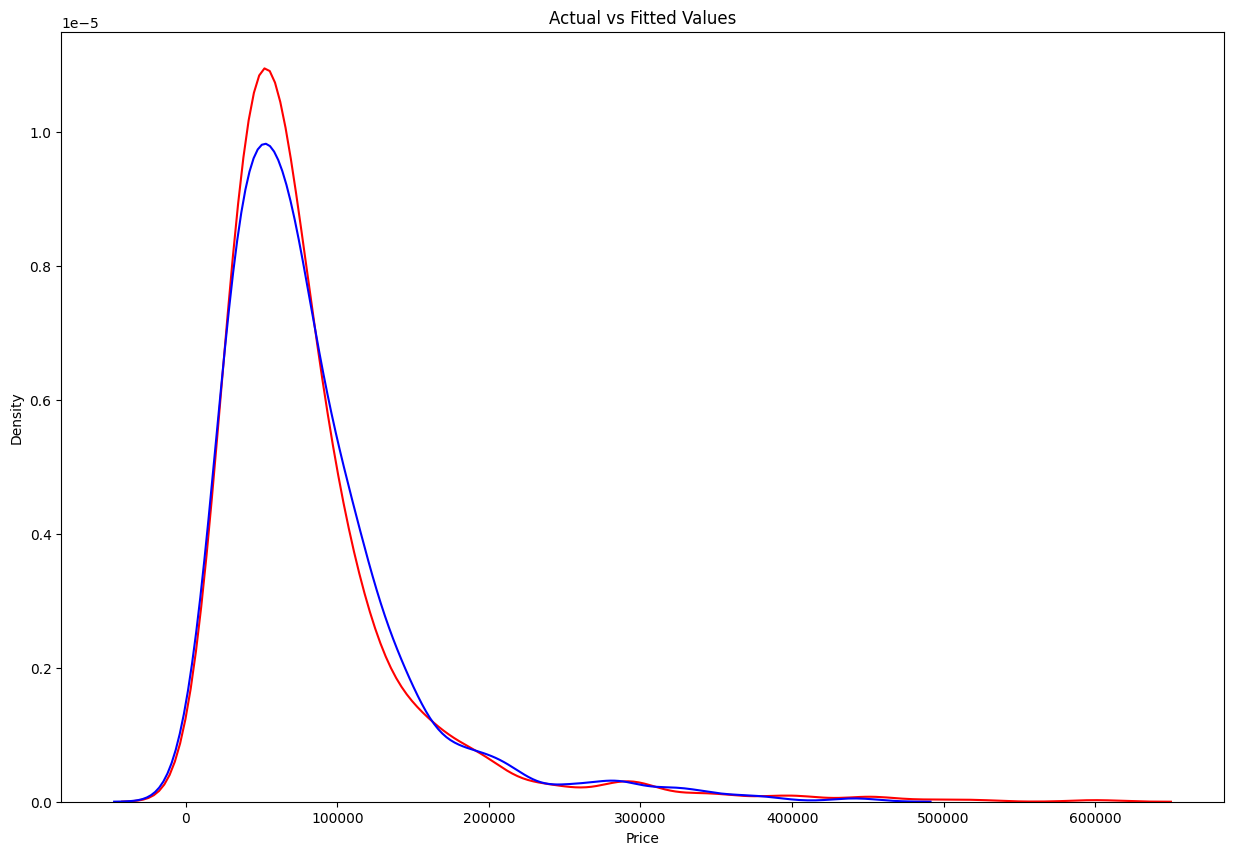

In [ ]:
Y_hat_1 = ridge.predict(x_transformed)

plt.figure(figsize = (15, 10))

ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
sns.distplot(Y_hat_1, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values")
plt.xlabel("Price")

plt.show()
plt.close()

Порівняно з лінійною, гребенева регресія має кращі результати, хоча зміна не висока

Спробуємо виправити помилки моделі завдяки стандартизації та поліномільній трансформації даних, а також підбору параметру alpha через пошук по сітці (Grid Search)

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly.fit_transform(x_transformed)
x_poly_scaled = StandardScaler().fit_transform(x_poly)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_poly_scaled, y, test_size = 0.4, random_state = 1)

In [ ]:
param_grid = {'alpha': np.logspace(-2, 10, 13)}
ridge = Ridge()
grid_search = GridSearchCV(estimator = ridge, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2)
grid_search.fit(x_train_p, y_train_p)

best_ridge = grid_search.best_estimator_
ridge_y_pred = best_ridge.predict(x_test_p)
rmse = np.sqrt(mean_squared_error(y_test_p, ridge_y_pred))
mape = mean_absolute_percentage_error(y_test_p, ridge_y_pred)
r2 = r2_score(y_test_p, ridge_y_pred)

print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

Fitting 5 folds for each of 13 candidates, totalling 65 fits
MAPE = 0.1710438291815642
RMSE = 23082.171489261153
R^2 = 0.8844094887999928


Значення метрик значно покращилися. Відобразимо діаграму розподілу

<ipython-input-42-ce87e0716dfd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
<ipython-input-42-ce87e0716dfd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat_2, hist = False, color = "b", label = "

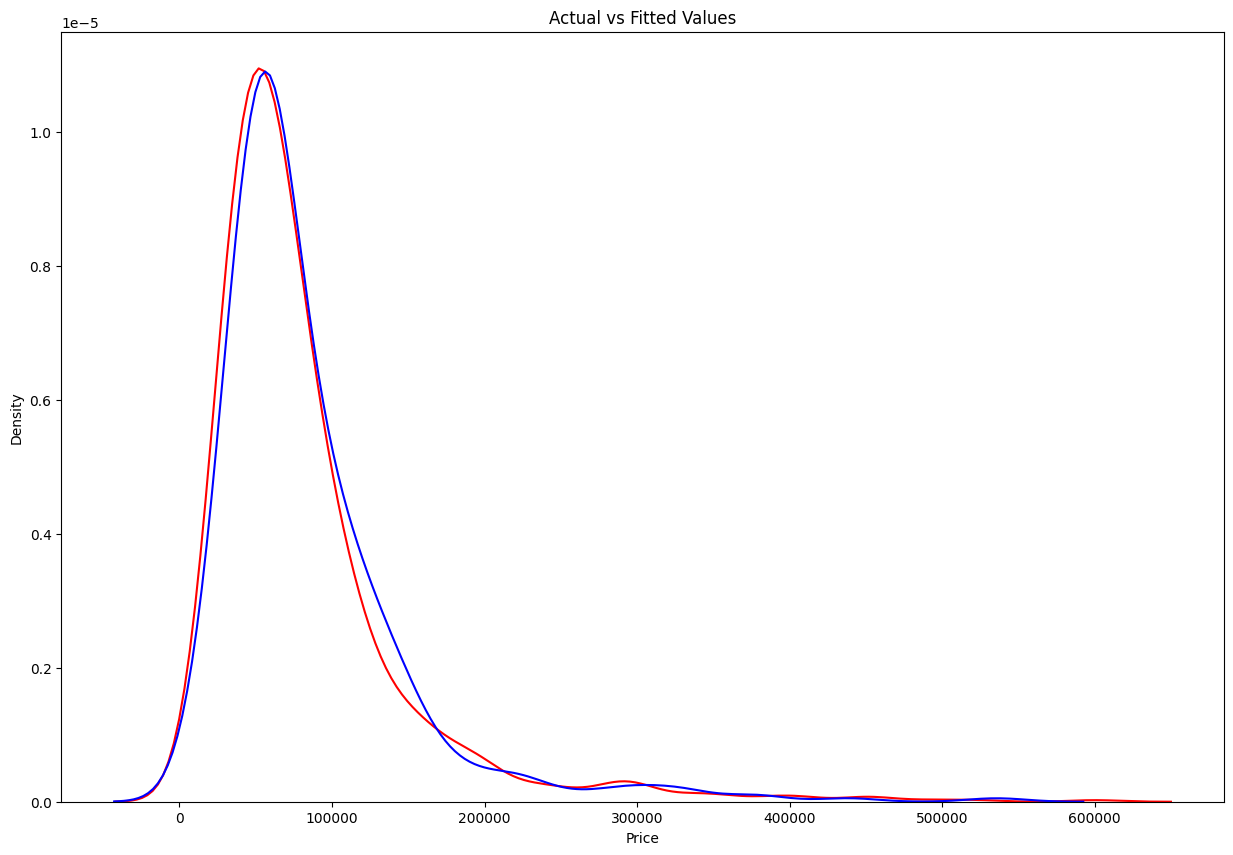

In [ ]:
Y_hat_2 = best_ridge.predict(x_test_p)

plt.figure(figsize = (15, 10))

ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
sns.distplot(Y_hat_2, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values")
plt.xlabel("Price")

plt.show()
plt.close()

Можна зробити наступний висновок: гребенева регресія з підбором гіперпараметру alpha показала значно вищі результати точності та значно нижчі результати помилок в порівнянні із лінійною регресією.

### Випадковий ліс

Модель випадкового лісу має меншу ймовірність перенавчання за рахунок створення великої кількості дерев на різних підвиборках даних та усереднення їх передбачень. Модель менш чутлива до викидів та шуму даних і загалом характеризується більшою стійкістю

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

MAPE = 0.17313189287210343
RMSE = 26949.834627046614
R^2 = 0.8424272672598802


Для візуалізації моделі випадкового лісу використаємо діаграму розподілу

<ipython-input-57-5d6c7f182ce1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
<ipython-input-57-5d6c7f182ce1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat_3, hist = False, color = "b", label = "

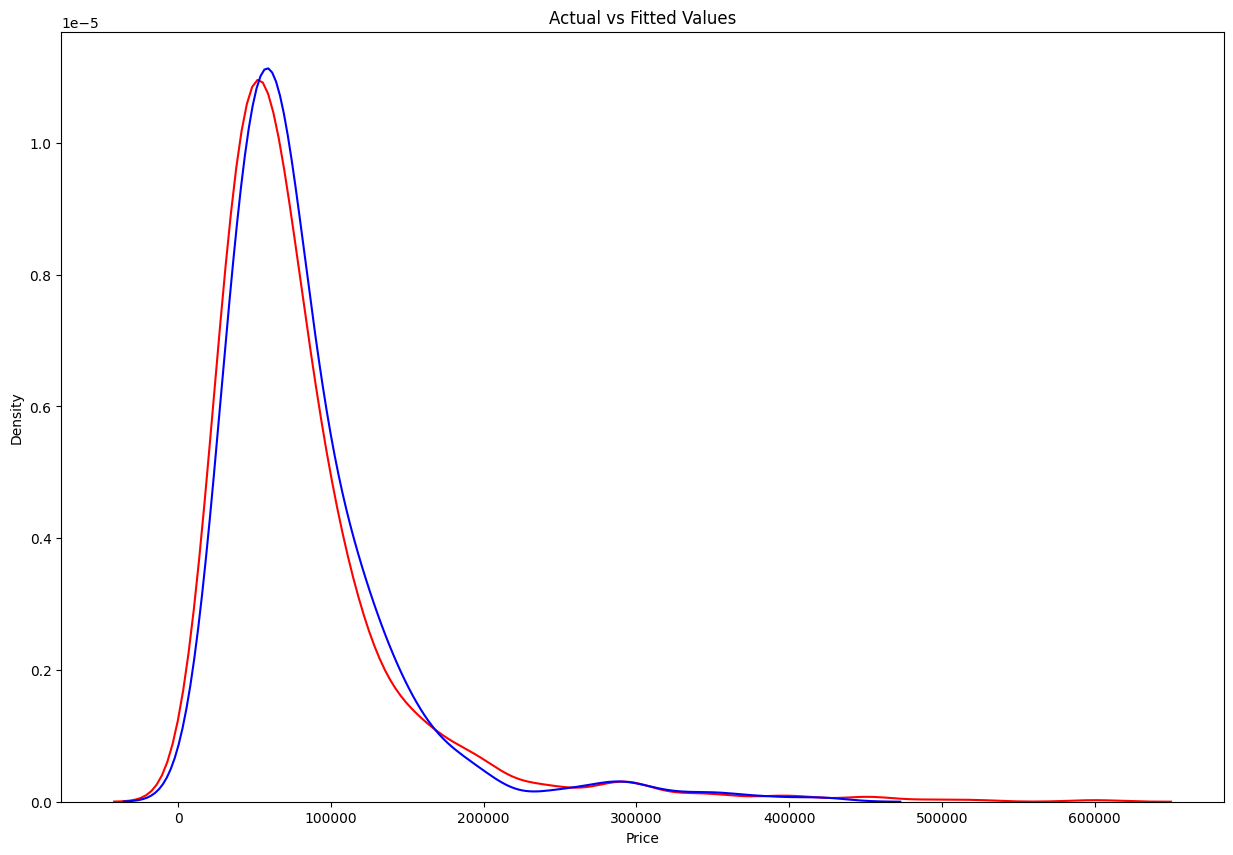

In [ ]:
Y_hat_3 = model_rf.predict(x_test)

plt.figure(figsize = (15, 10))

ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
sns.distplot(Y_hat_3, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values")
plt.xlabel("Price")

plt.show()
plt.close()

Модель Random Forest чудово справляється з передбаченням ціни, на що вказує діаграма розподілу і низьке значення Mean Absolute Percentage Error (MAPE).

Значення R^2, порівняно із лінійною регресією, зменшилося, а RMSE навпаки збільшилося. Спробуємо покращити результати моделі завдяки підбору параметрів

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500, 700, 1000],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

best_rf_y_pred = best_rf.predict(x_test)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_y_pred))
best_rf_mape = mean_absolute_percentage_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}', '\n')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 4 folds for each of 1680 candidates, totalling 6720 fits
MAPE = 0.17313189287210343
RMSE = 26949.834627046614
R^2 = 0.8424272672598802 

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


На жаль, підбір параметрів жодним чином не покращив ситуацію. Спробуємо підвищити результати точності через стандартизацію та поліноміальну трансформацію даних

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
model_rf.fit(x_train_p, y_train_p)

y_pred = model_rf.predict(x_test_p)
rmse = np.sqrt(mean_squared_error(y_test_p, y_pred))
mape = mean_absolute_percentage_error(y_test_p, y_pred)
r2 = r2_score(y_test_p, y_pred)

print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

MAPE = 0.17166573075668498
RMSE = 26105.378550344216
R^2 = 0.8521474400882985


Для візуалізації моделі використаємо діаграму розпроділу

<ipython-input-68-367918fe7f48>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
<ipython-input-68-367918fe7f48>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat_4, hist = False, color = "b", label = "

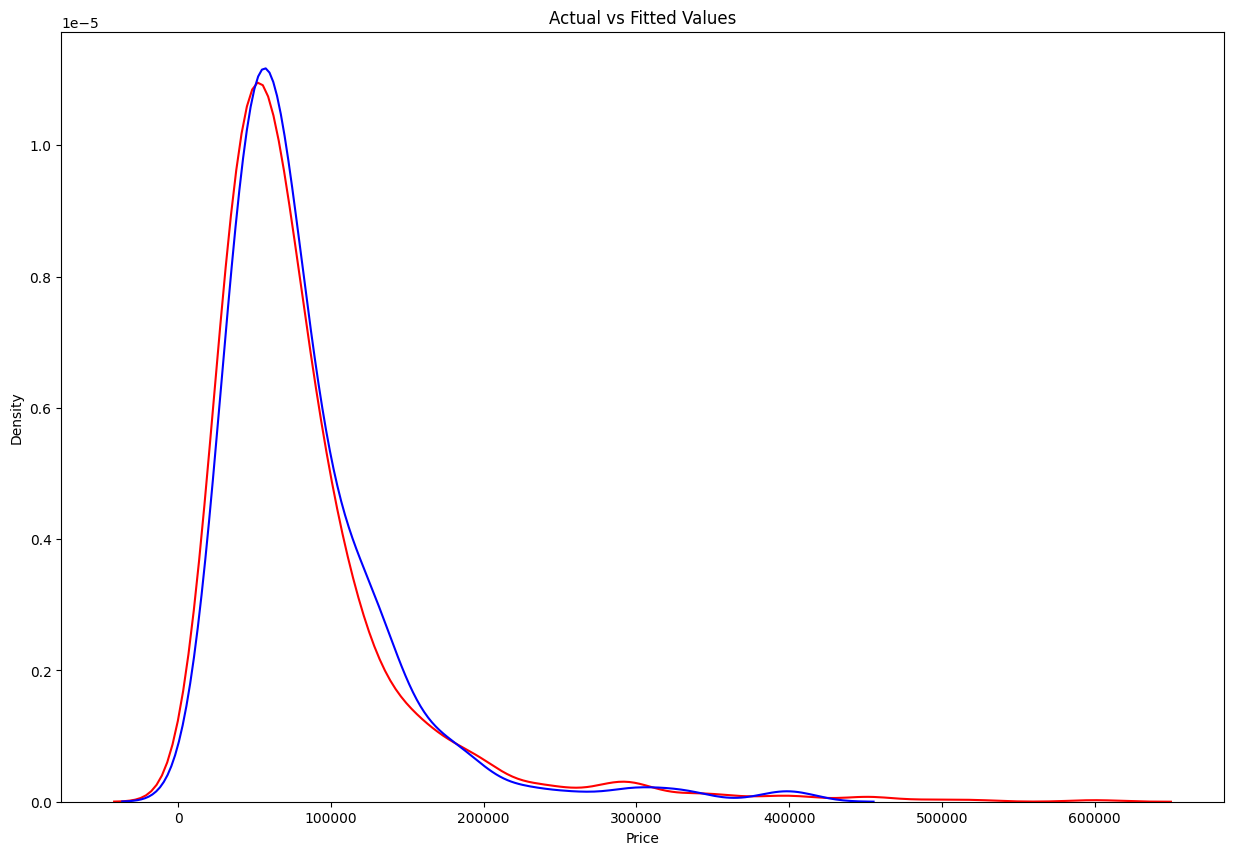

In [ ]:
Y_hat_4 = model_rf.predict(x_test_p)

plt.figure(figsize = (15, 10))

ax1 = sns.distplot(df['Price'], hist = False, color = "r", label = "Actual Values")
sns.distplot(Y_hat_4, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values")
plt.xlabel("Price")

plt.show()
plt.close()

Точність моделі трохи покращилася, хоча вона все ще не така висока, як у гребеневої регресії. З графіку очевидно, що модель випадкового лісу значно краще справляється із передбаченням ціни за лінійну регресію

## Висновки

Завдяки візуалізаціям, кореляційному та факторному аналізу, дисперсійному аналізу було обрано найбільш підходящі предиктори для передбачення ціни. На їх основі навчено 3 моделі: модель лінійної регресії, модель гребеневої регресії та модель випадкового лісу.

За оцінками точності виявлено, що гребенева регресія з стандартизацією та поліноміальною трансформацією даних, а також підбору параметру alpha через пошук по сітці виявилася найкращою. Чудові результати показала і модель випадкового лісу, а модель лінійної регресії показала все ще високі, але дещо гірші результати у порівнянні з іншими моделями

Зіставимо діаграми розподілу кожної моделі в рамках одного графіку для наочної оцінки точності

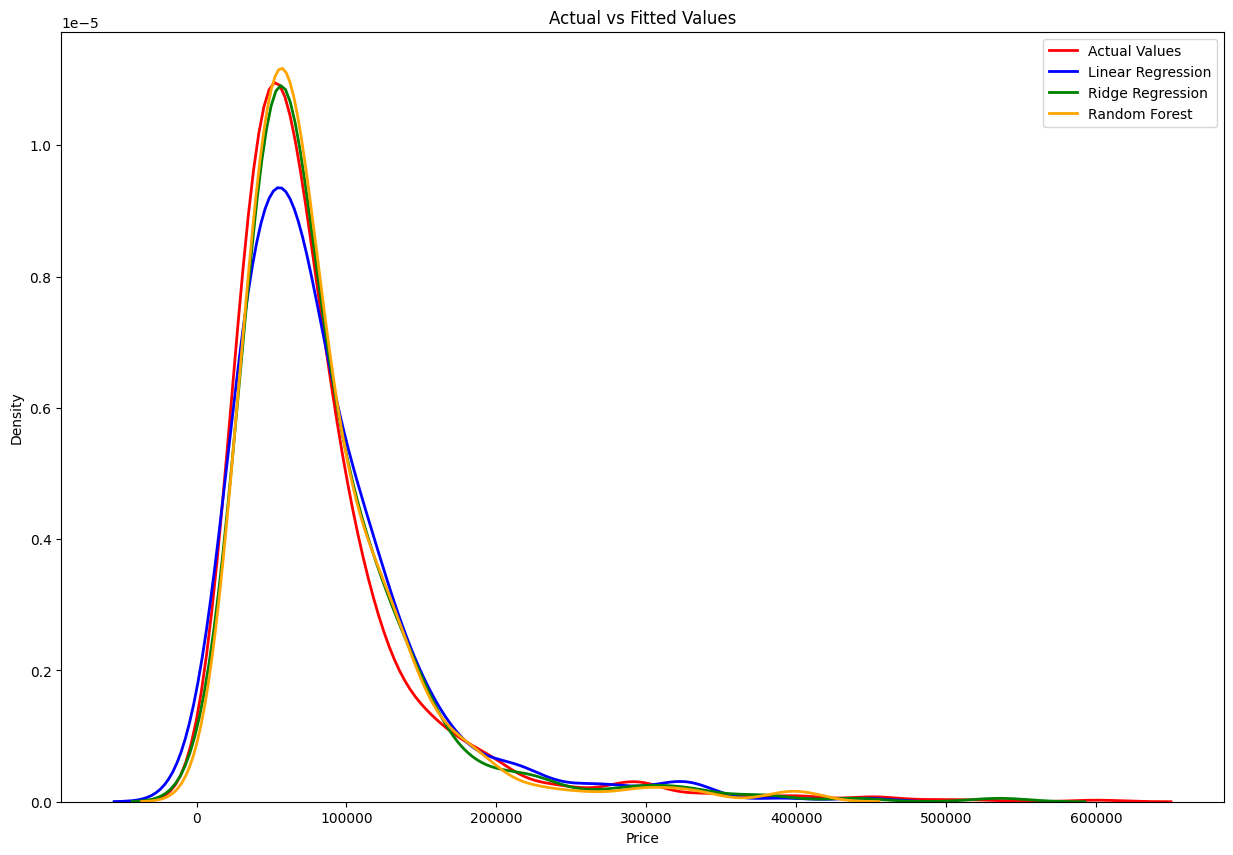

In [ ]:
plt.figure(figsize = (15, 10))

ax1 = sns.kdeplot(df['Price'], color = "red", label = "Actual Values", lw = 2)
sns.kdeplot(Y_hat_0, color = "blue", label = "Linear Regression", ax = ax1, lw = 2)
sns.kdeplot(Y_hat_2, color = "green", label = "Ridge Regression", ax = ax1, lw = 2)
sns.kdeplot(Y_hat_4, color = "orange", label = "Random Forest", ax = ax1, lw = 2)

plt.title("Actual vs Fitted Values")
plt.xlabel("Price")

plt.legend()
plt.show()
plt.close()

<h2>Виконав студент групи ІП-22 <br> Нижник Дмитро</h2>